<a href="https://colab.research.google.com/github/pathakadithi/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Create folder for outputs
import os
os.makedirs('/content/drive/MyDrive/EDA_outputs', exist_ok=True)


Mounted at /content/drive


In [ ]:
# path example: /content/drive/MyDrive/datasets/titanic.csv
data_path = '/content/drive/MyDrive/datasets/Titanic-Dataset.csv'


In [ ]:
# Load the Dataset
from google.colab import files
uploaded = files.upload()  # select the CSV file from your PC
# After upload the file is in /content


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
# Install/Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn-v0_8')

sns.set_style('whitegrid')


In [ ]:
from google.colab import files

# Upload CSV manually
uploaded = files.upload()  # select your CSV file
file_name = list(uploaded.keys())[0]

# Load dataset
df = pd.read_csv(file_name)
df.head()


Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Basic info
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
summary = df.describe(include='all').T
summary['median'] = df.median(numeric_only=True)
summary


Shape: (891, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,median
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0,446.0000
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0,0.0000
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0,3.0000
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0,28.0000
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0,0.0000
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0,0.0000
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292,14.4542


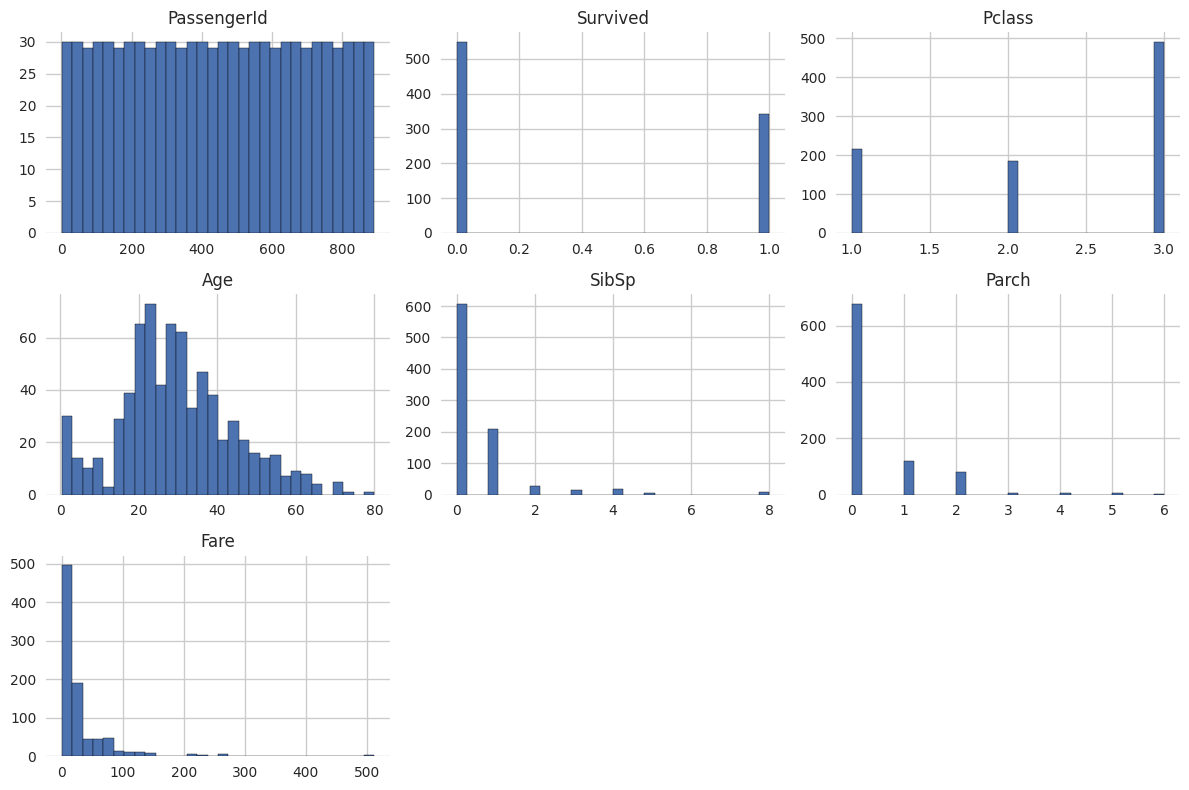

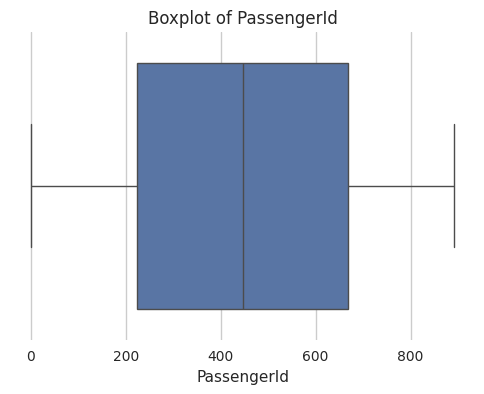

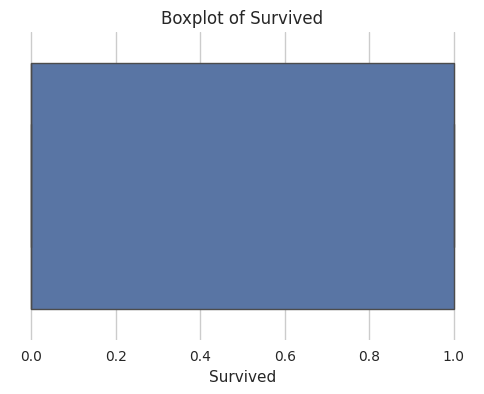

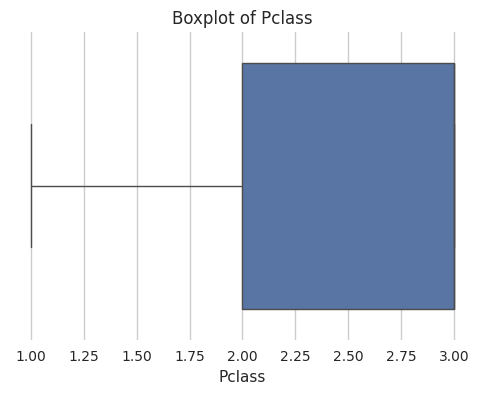

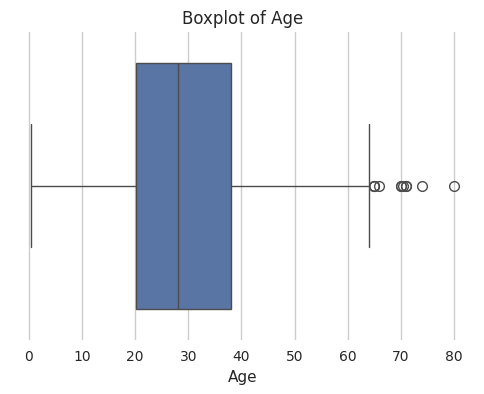

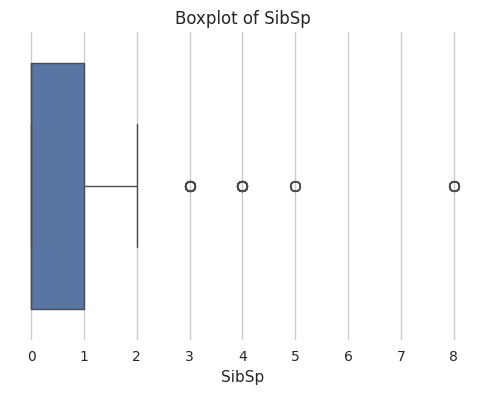

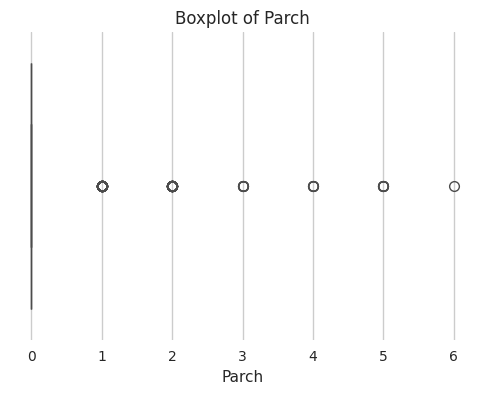

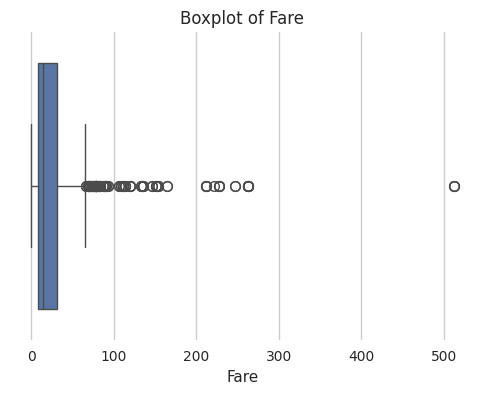

In [ ]:
num_cols = df.select_dtypes(include='number').columns.tolist()

# Histograms
df[num_cols].hist(bins=30, figsize=(12,8), edgecolor='black')
plt.tight_layout()
plt.show()

# Boxplots
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


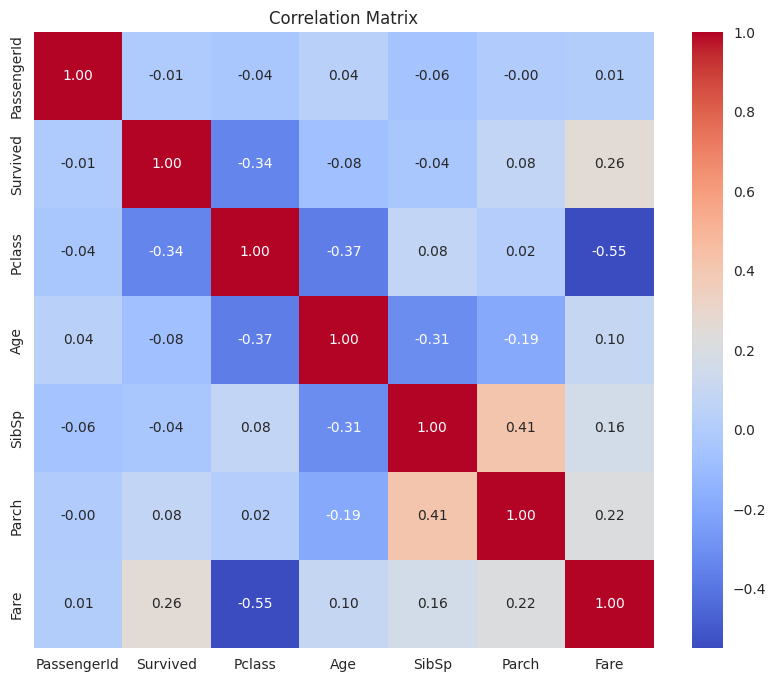

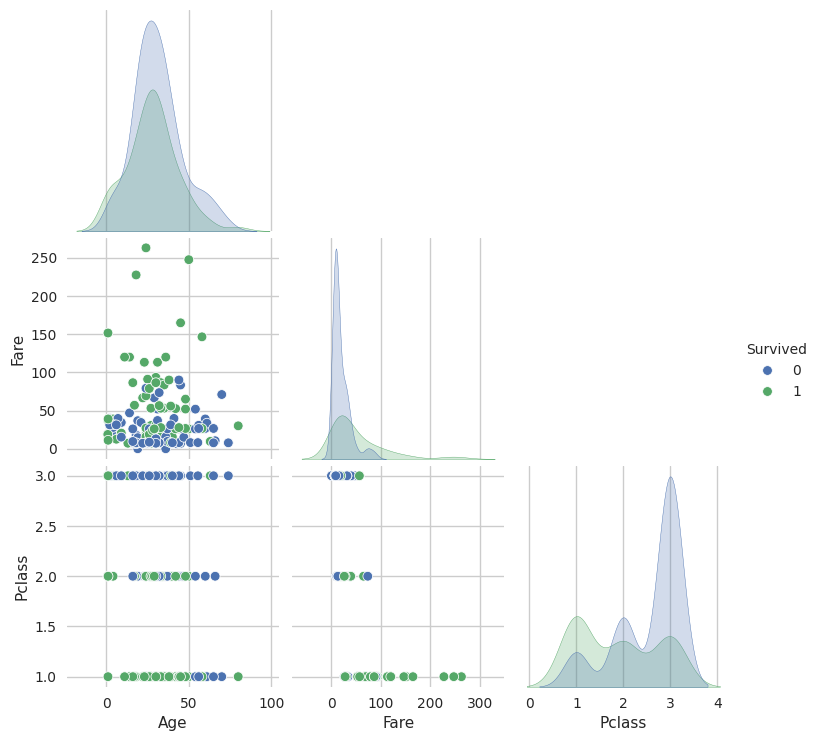

In [ ]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairplot (sample features to avoid clutter)
selected_cols = ['Age','Fare','Pclass','Survived']
sns.pairplot(df[selected_cols].dropna().sample(200), hue='Survived', corner=True)
plt.show()


In [ ]:
# Example 1: Survival rate by Sex
print(df.groupby('Sex')['Survived'].mean())

# Example 2: Survival rate by Passenger Class
print(df.groupby('Pclass')['Survived'].mean())

# Example 3: Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print(df.groupby('FamilySize')['Survived'].mean().head(10))

# Detect anomalies/outliers in Fare
fare_outliers = df[df['Fare'] > df['Fare'].quantile(0.99)]
fare_outliers[['Name','Fare','Pclass']]


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


,Name,Fare,Pclass
27,"Fortune, Mr. Charles Alexander",263.0000,1
88,"Fortune, Miss. Mabel Helen",263.0000,1
258,"Ward, Miss. Anna",512.3292,1
311,"Ryerson, Miss. Emily Borie",262.3750,1
341,"Fortune, Miss. Alice Elizabeth",263.0000,1
438,"Fortune, Mr. Mark",263.0000,1
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292,1
737,"Lesurer, Mr. Gustave J",512.3292,1
742,"Ryerson, Miss. Susan Parker ""Suzette""",262.3750,1


In [ ]:
df.to_csv('/content/titanic_processed.csv', index=False)


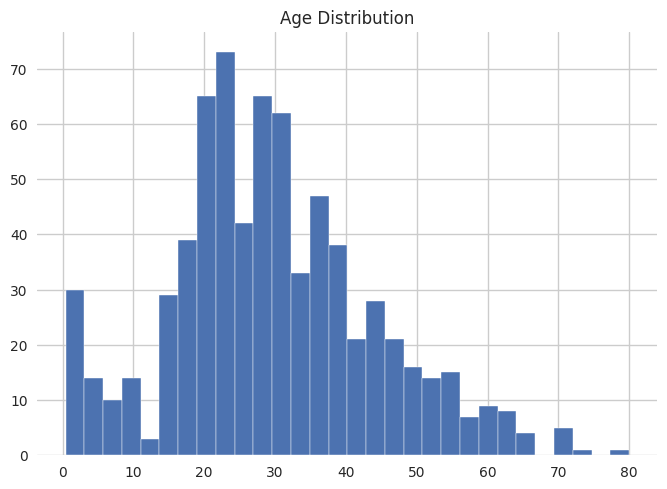

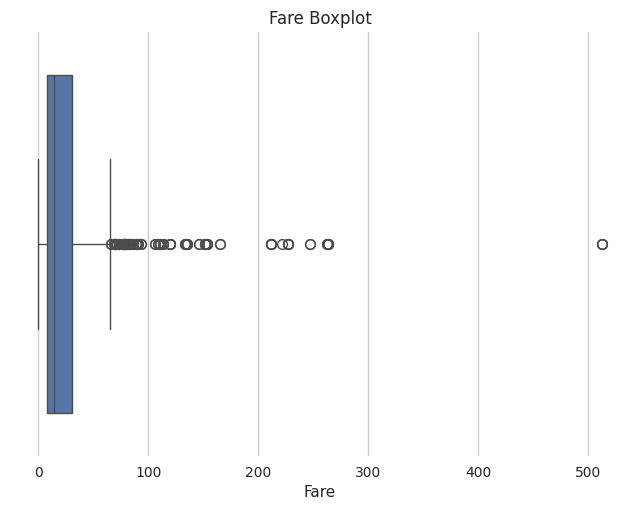

In [ ]:
# Example: Age histogram
plt.figure()
df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.savefig('/content/age_hist.png', bbox_inches='tight')

# Example: Fare boxplot
plt.figure()
sns.boxplot(x=df['Fare'])
plt.title('Fare Boxplot')
plt.savefig('/content/fare_boxplot.png', bbox_inches='tight')
